In [1]:
import os

import numpy as np
from sklearn.manifold import TSNE
import pandas as pd

import matplotlib
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

from utils import load_hidden_representations_from_hdf5, read_templates_from_file, read_predictions_from_file

----

In [2]:
# params
log_dir = "/logfiles"
model = "bigscience-T0"
module = "decoder"
task = "wic"

In [3]:
# assertions
assert model == "bigscience-T0"
assert module == "decoder"
assert task == "wic"

## Prompts

In [4]:
df = read_templates_from_file(f"/t0-analysis/prompts/{task}/all.csv")
# df = read_templates_from_file(f"/t0-analysis/prompts/{task}/fixed_prompt.csv")
# df = read_templates_from_file(f"/t0-analysis/prompts/{task}/fixed_target_yes_no.csv")
display(df)

name  \
0                  gpt_3_without_targets   
1              gpt_3_yes_no_with_targets   
2               affirmation_with_targets   
3          grammar_homework_with_targets   
4                polysemous_with_targets   
5       question_context_without_targets   
6       question_meaning_without_targets   
7   question_meaning_yes_no_with_targets   
8                same_sense_with_targets   
9          similar_sense_without_targets   
10     similar_sense_yes_no_with_targets   
11         gpt_3_true_false_with_targets   
12            gpt_3_cat_dog_with_targets   

                                             template     category  \
0   {sentence1} {sentence2} Question: Is the word ...  instructive   
1   {sentence1} {sentence2} Question: Is the word ...  instructive   
2   Sentence A: {sentence1} Sentence B: {sentence2...  instructive   
3   Decide whether the word "{word}" is used with ...  instructive   
4   The word "{word}" has multiple meanings. Does ...  instructive   
5   Determine if the word "{word}" is used in the ...  instructive   
6   Determine if the word "{word}" have the same m...  instructive   
7   Does the word "{word}" have the same meanining...  instructive   
8   Sentence 1: {sentence1} Sentence 2: {sentence2...  instructive   
9    {sentence1} {sentence2} Similar sense of {word}?  instructive   
10  {sentence1} {sentence2} Similar sense of {word...  instructive   
11  {sentence1} {sentence2} Question: Is the word ...  instructive   
12  {sentence1} {sentence2} Question: Is the word ...  instructive   

    includes_targets               targets  target_ids  shuffle  
0              False  ▁No, ▁no, ▁Yes, ▁yes  0, 0, 1, 1    False  
1               True             ▁No, ▁Yes        0, 1    False  
2               True           ▁Fal, ▁True        0, 1    False  
3               True             ▁No, ▁Yes        0, 1    False  
4               True             ▁No, ▁Yes        0, 1    False  
5              False  ▁No, ▁no, ▁Yes, ▁yes  0, 0, 1, 1    False  
6              False  ▁No, ▁no, ▁Yes, ▁yes  0, 0, 1, 1    False  
7               True             ▁No, ▁Yes        0, 1    False  
8               True             ▁No, ▁Yes        0, 1    False  
9              False  ▁No, ▁no, ▁Yes, ▁yes  0, 0, 1, 1    False  
10              True             ▁No, ▁Yes        0, 1    False  
11              True           ▁Fal, ▁True        0, 1    False  
12              True            ▁Cat, ▁Dog        0, 1    False

In [5]:
# load prompted inputs and labels
df_inputs = {}
for _, row in df.iterrows():
    prompt = row['name']
    df_inputs[prompt] = pd.read_csv(f"/logfiles/{task}/{model}/{module}/{prompt}/prompted_samples.csv", sep='\t', index_col=0)


In [6]:
df_inputs['gpt_3_yes_no_with_targets'].head()

input  label prediction
0  An emerging professional class. Apologizing fo...  False      False
1  Businessmen of every stripe joined in oppositi...  False      False
2  As he called the role he put a check mark by e...  False      False
3  She gave her hair a quick brush. The dentist r...   True      False
4  The child's acquisition of language. That grap...  False       True

In [7]:
# load decoded predictions
df_outputs = {}
for _, row in df.iterrows():
    prompt = row['name']
    df_outputs[prompt] = pd.read_csv(f"/logfiles/{task}/{model}/{module}/{prompt}/decoded_predictions.csv", sep='\t', names=['predicitons'])

In [8]:
df_outputs['gpt_3_yes_no_with_targets'].head()

predicitons
0   ['<pad>', '▁No', '</s>']
1   ['<pad>', '▁No', '</s>']
2   ['<pad>', '▁No', '</s>']
3   ['<pad>', '▁No', '</s>']
4  ['<pad>', '▁Yes', '</s>']

## Plot t-SNE embeddings

In [9]:
use_pattern = [
    "gpt_3_without_targets",
    "gpt_3_yes_no_with_targets",
    # "affirmation_with_targets",
    "grammar_homework_with_targets",
    # "polysemous_with_targets",
    # "question_context_without_targets",
    # "question_meaning_without_targets",
    # "question_meaning_yes_no_with_targets",
    # "same_sense_with_targets",
    # "similar_sense_without_targets",
    # "similar_sense_yes_no_with_targets",
    "gpt_3_true_false_with_targets",
    "gpt_3_cat_dog_with_targets",
]

In [10]:
# use either ground-truth or predicted label for marker size
# marker_size = 'ground-truth'
marker_size = 'predicted'

(3190, 4096)


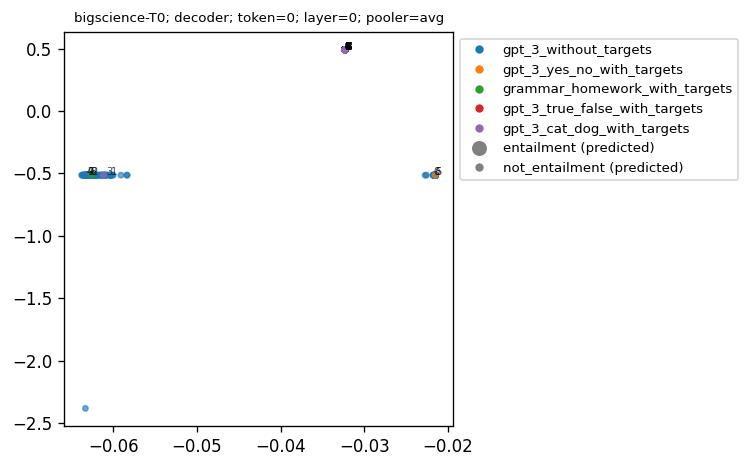

(3190, 4096)


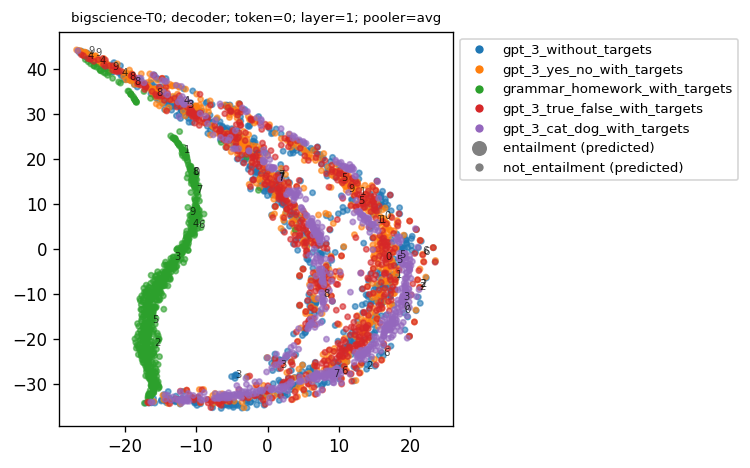

(3190, 4096)


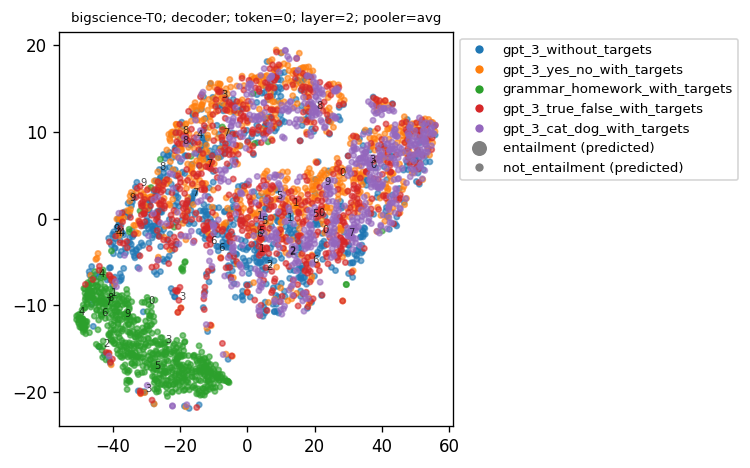

(3190, 4096)


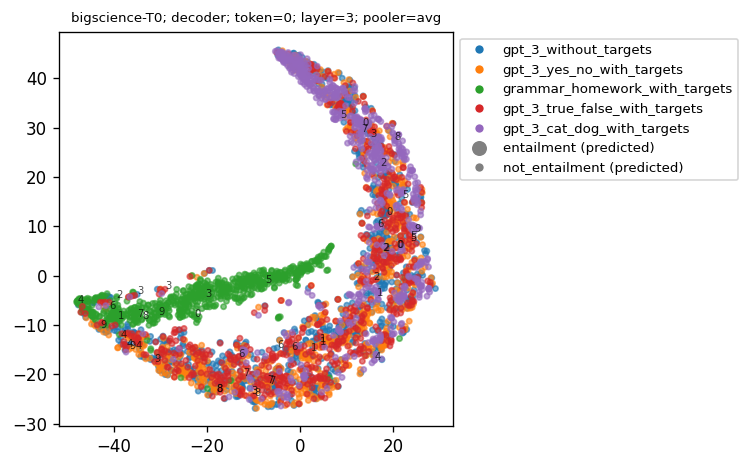

(3190, 4096)


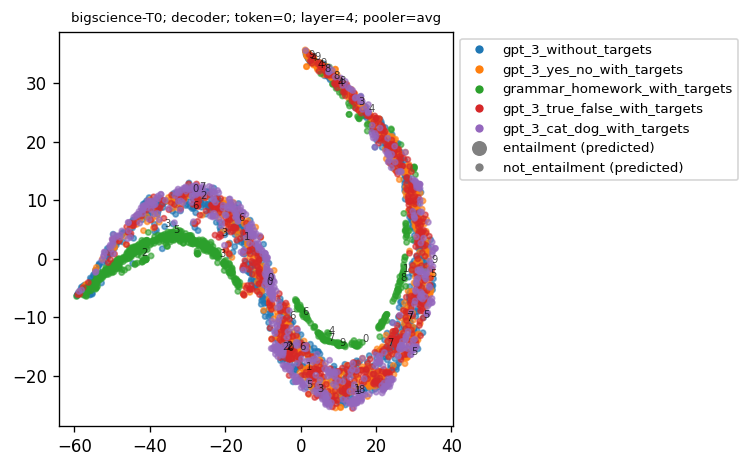

(3190, 4096)


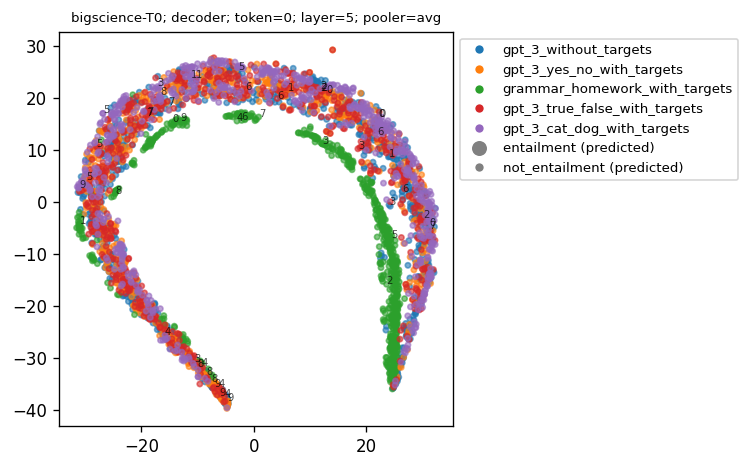

(3190, 4096)


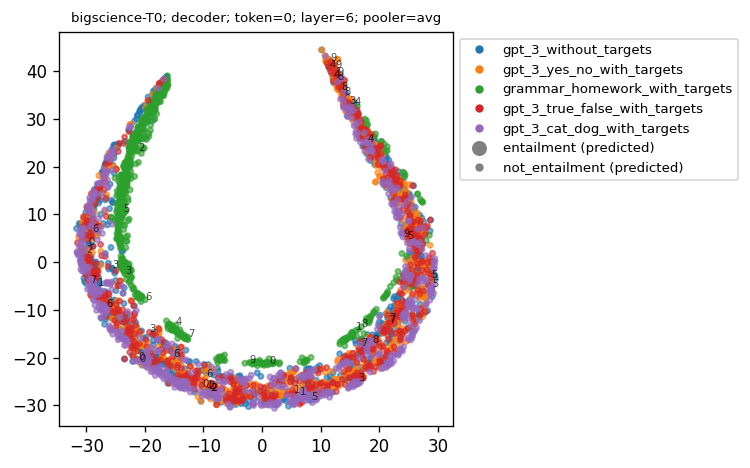

(3190, 4096)


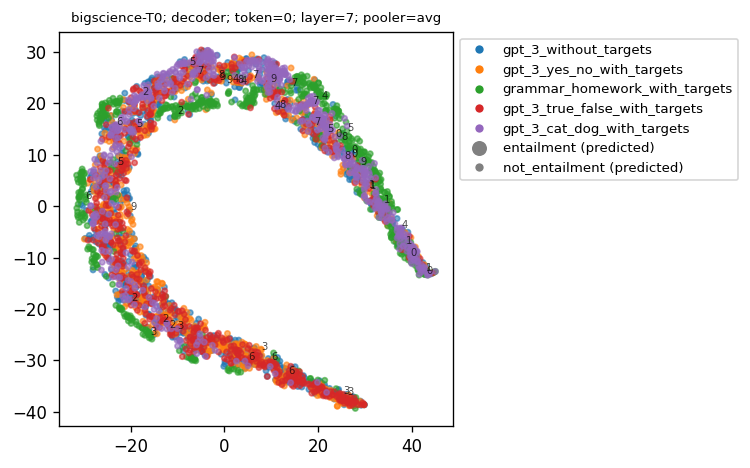

(3190, 4096)


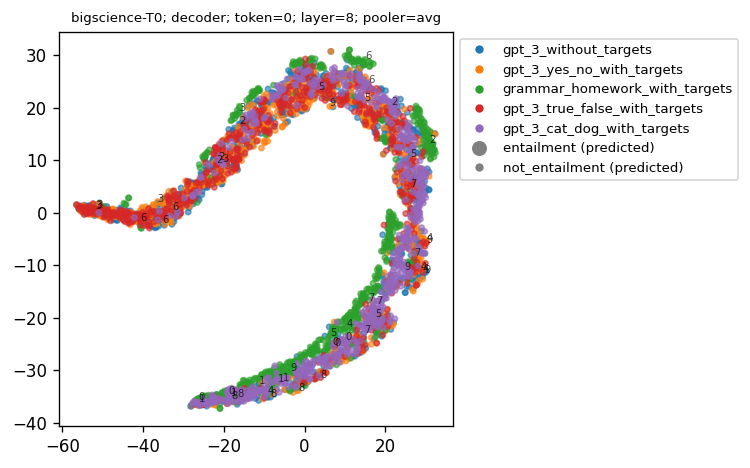

(3190, 4096)


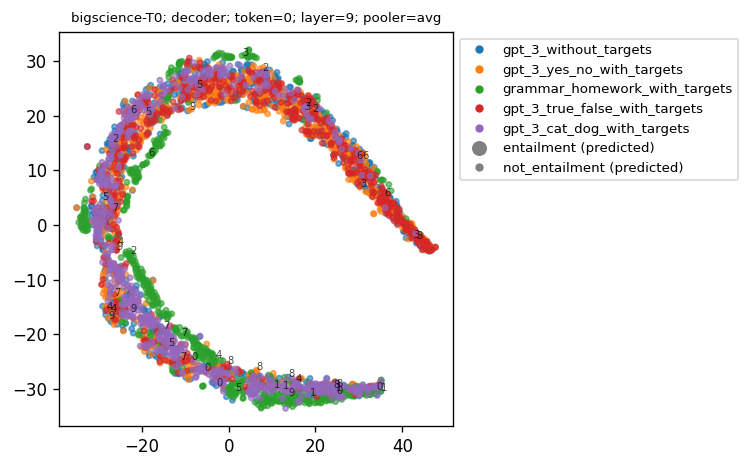

(3190, 4096)


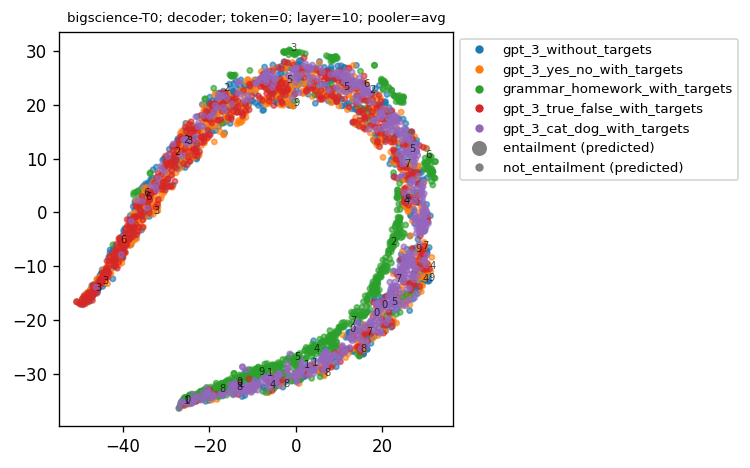

(3190, 4096)


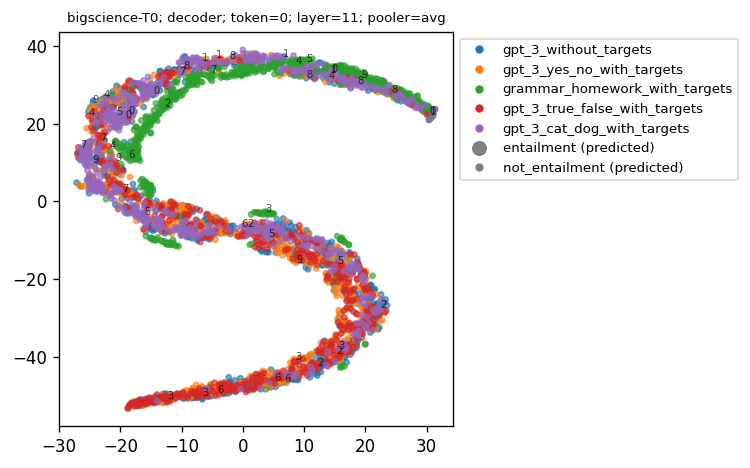

(3190, 4096)


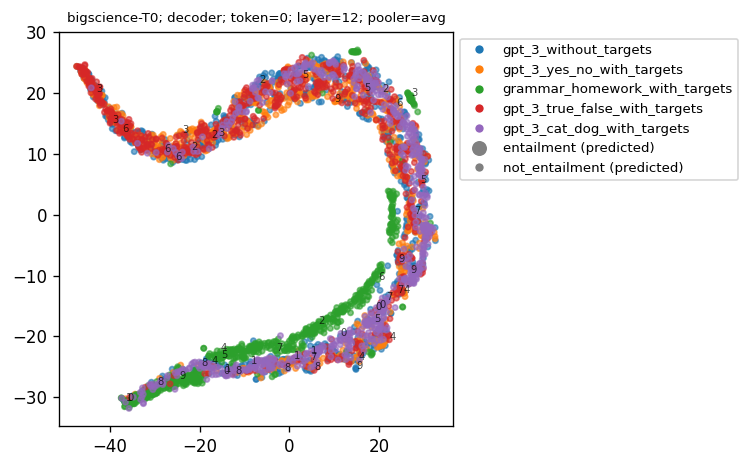

(3190, 4096)


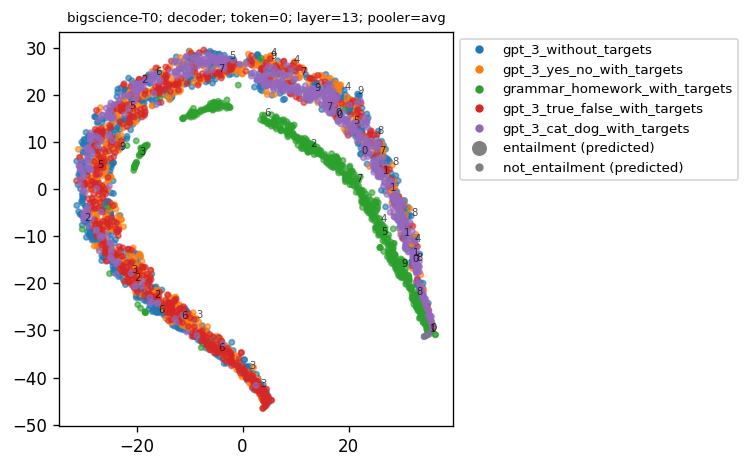

(3190, 4096)


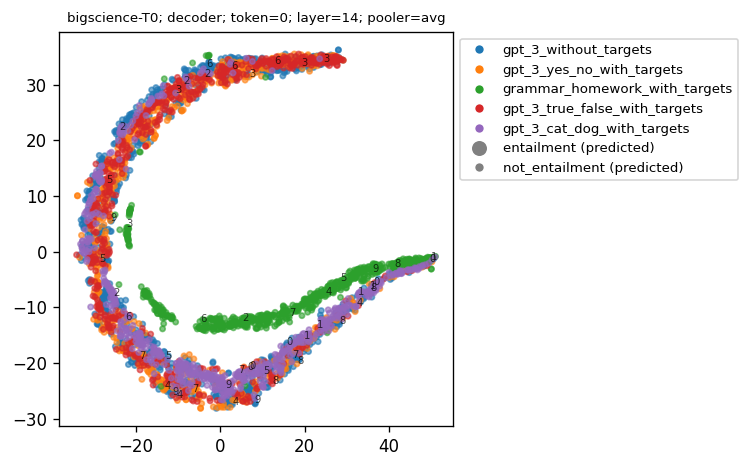

(3190, 4096)


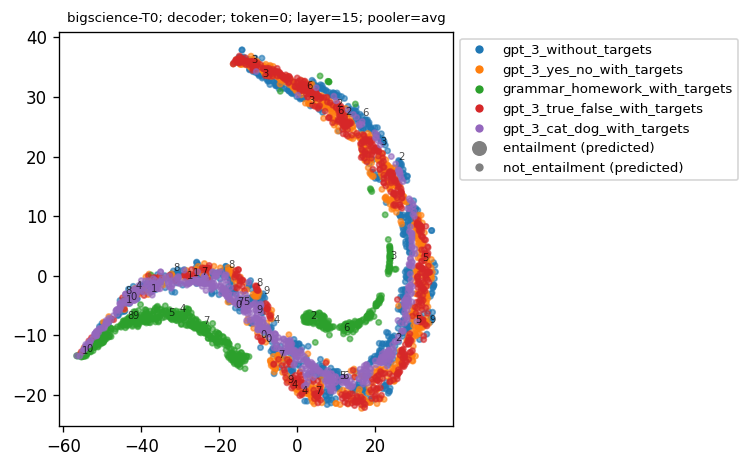

(3190, 4096)


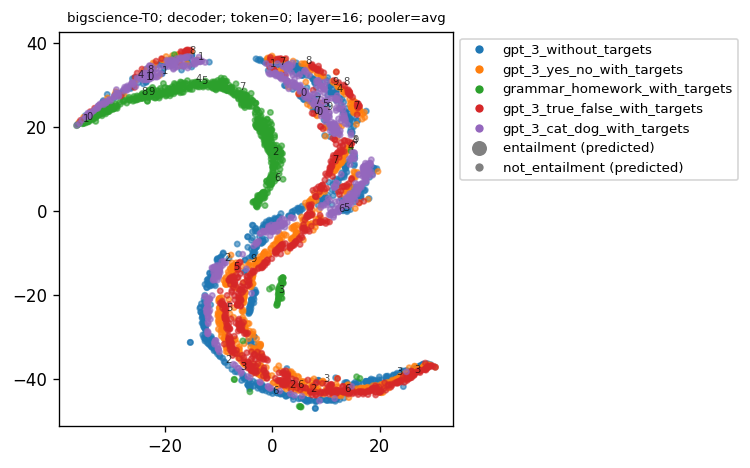

(3190, 4096)


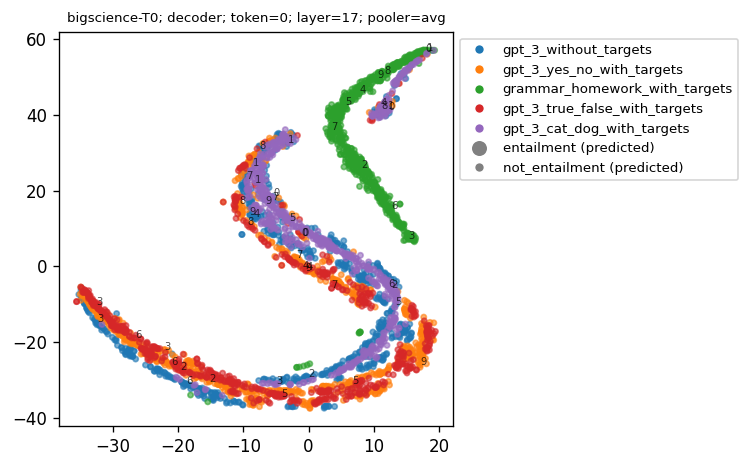

(3190, 4096)


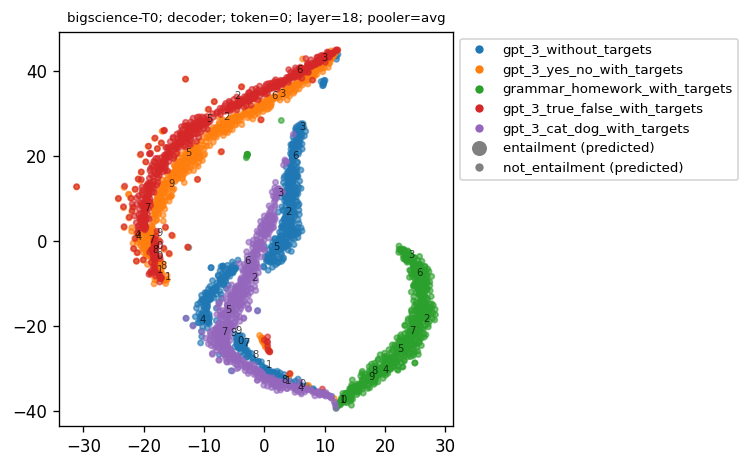

(3190, 4096)


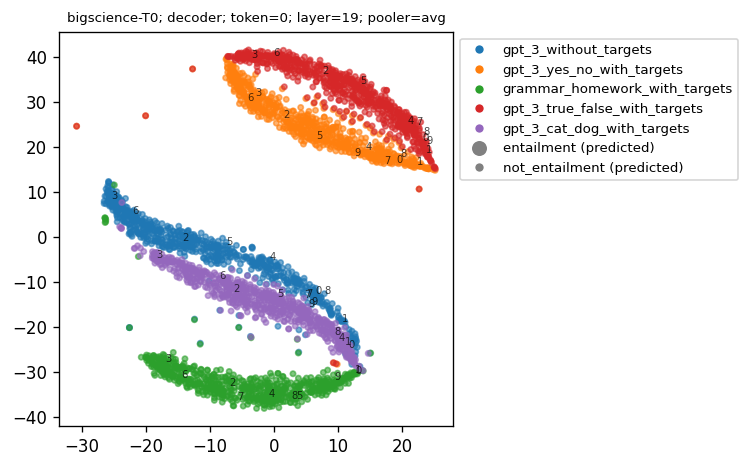

(3190, 4096)


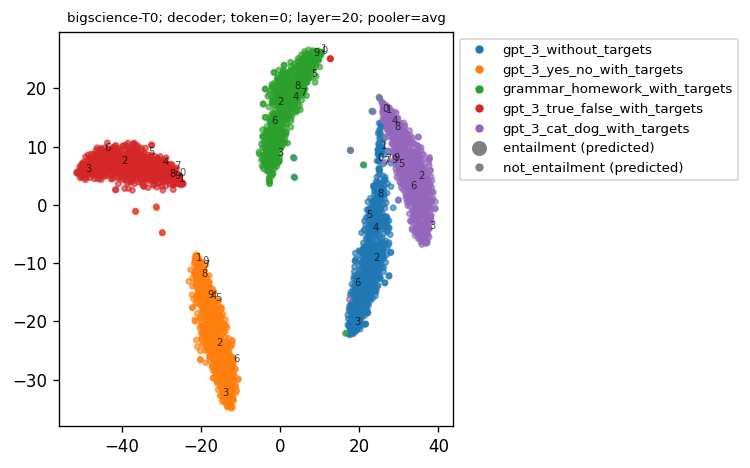

(3190, 4096)


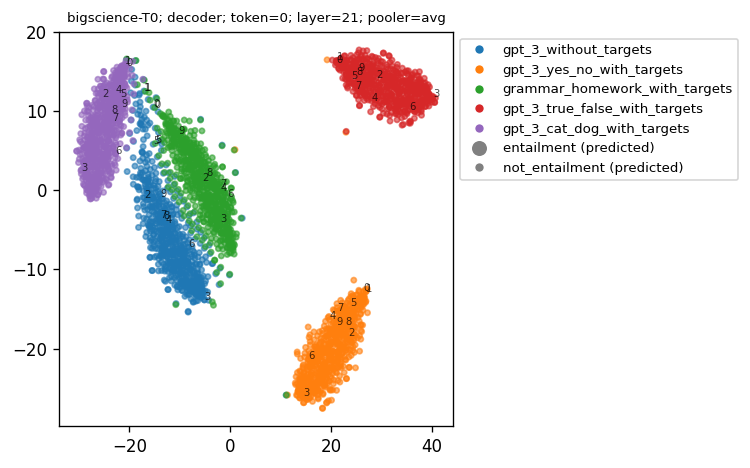

(3190, 4096)


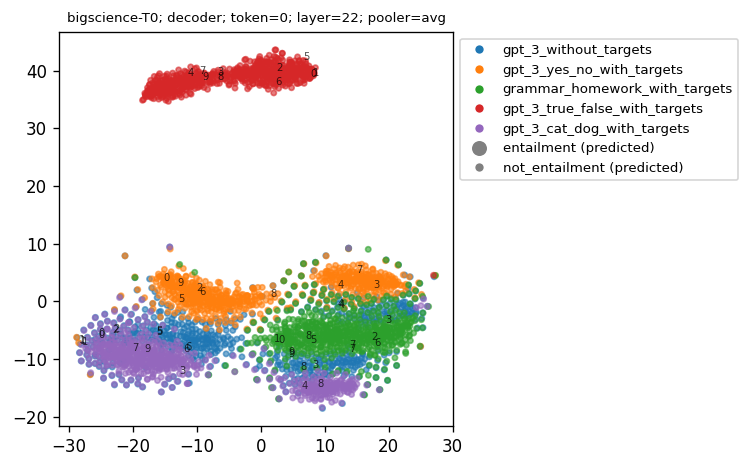

(3190, 4096)


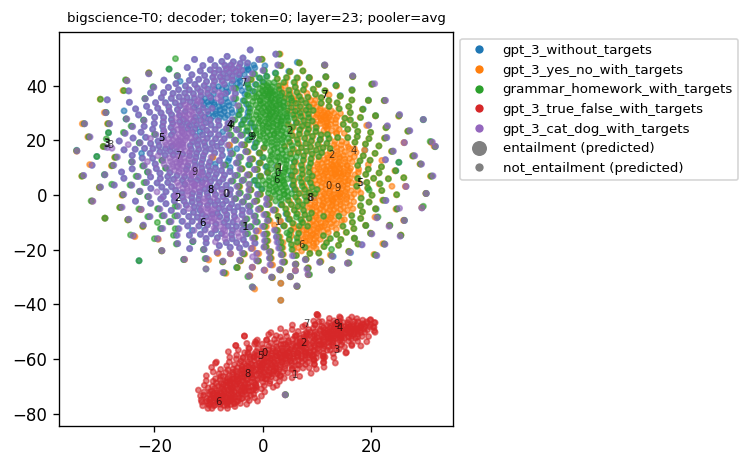

(3190, 4096)


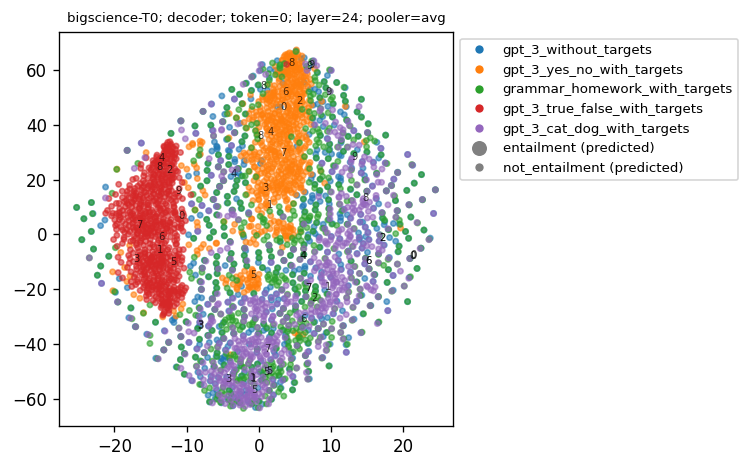

(3190, 4096)


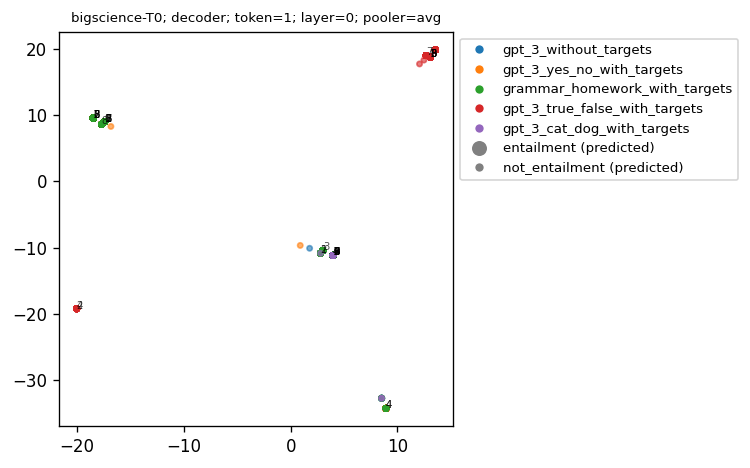

(3190, 4096)


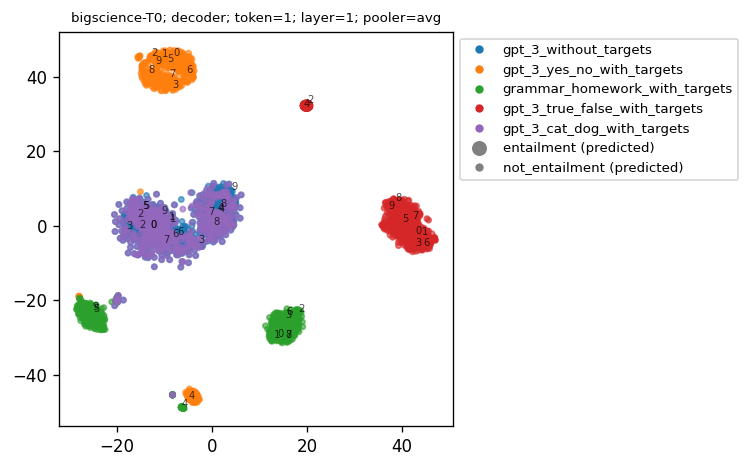

(3190, 4096)


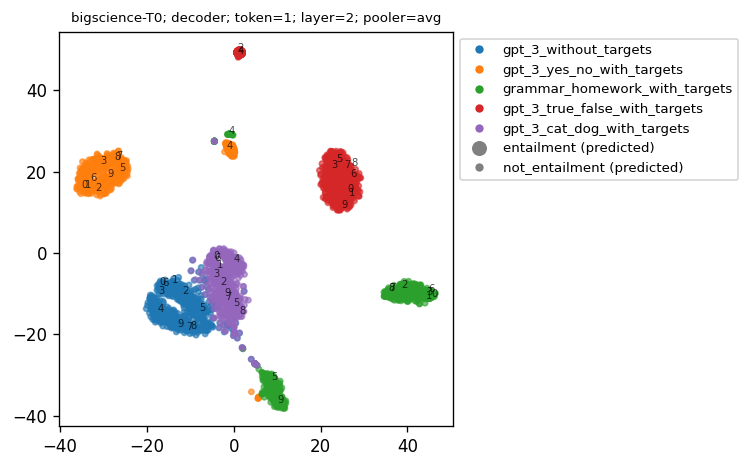

(3190, 4096)


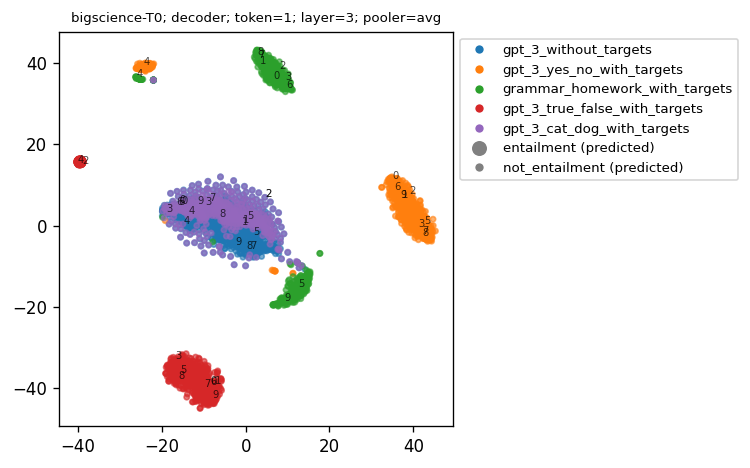

(3190, 4096)


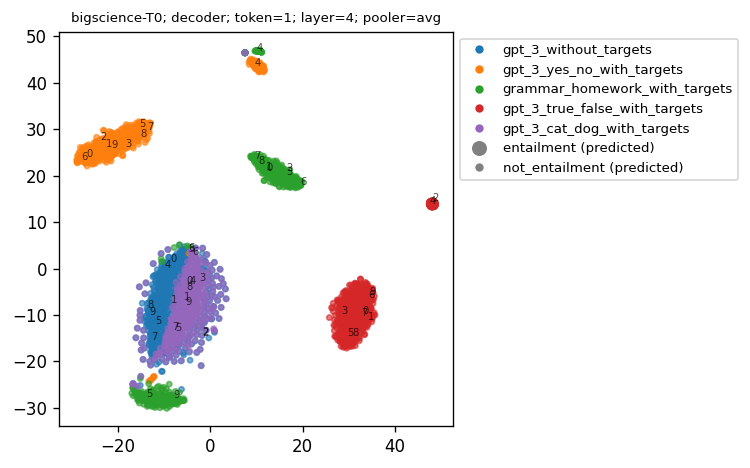

(3190, 4096)


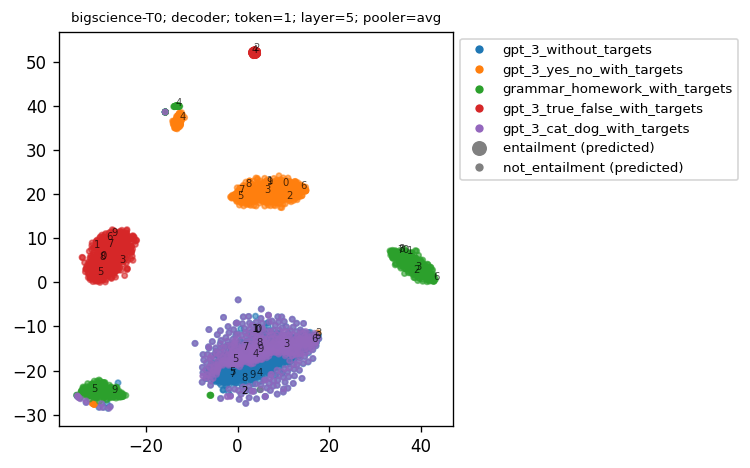

(3190, 4096)


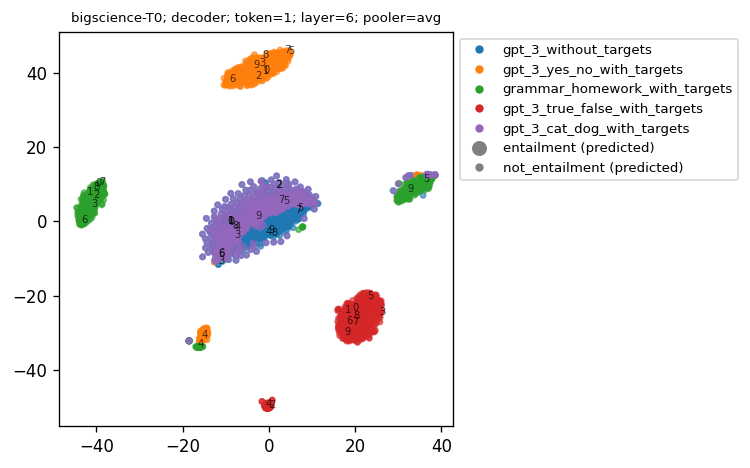

(3190, 4096)


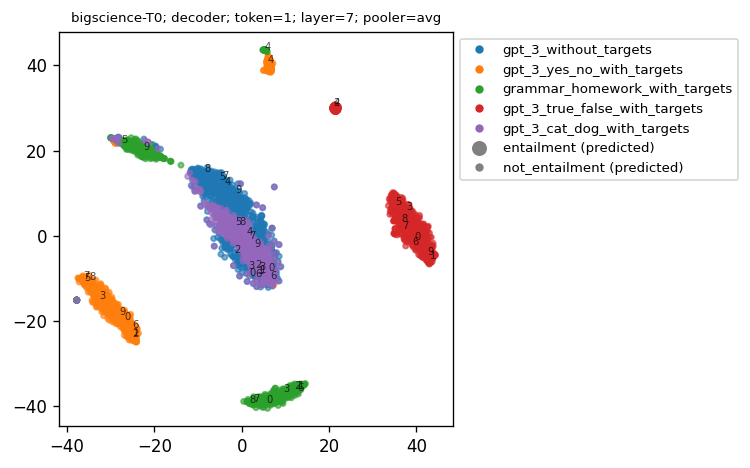

(3190, 4096)


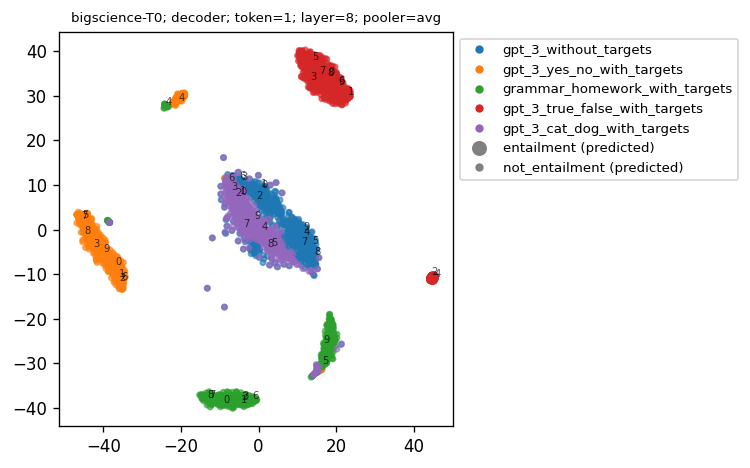

(3190, 4096)


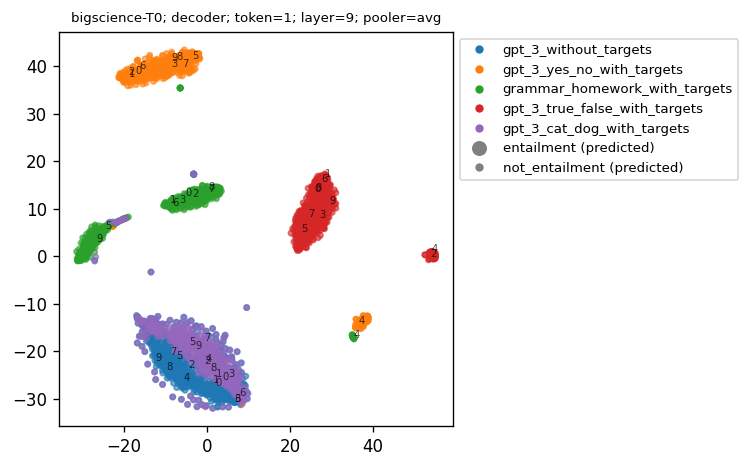

(3190, 4096)


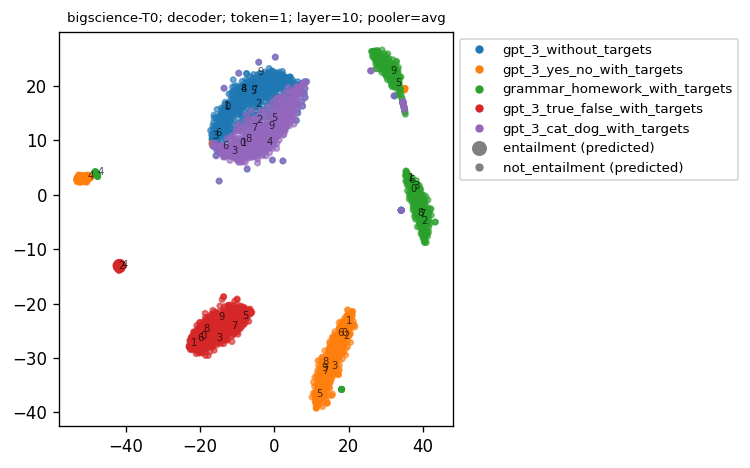

(3190, 4096)


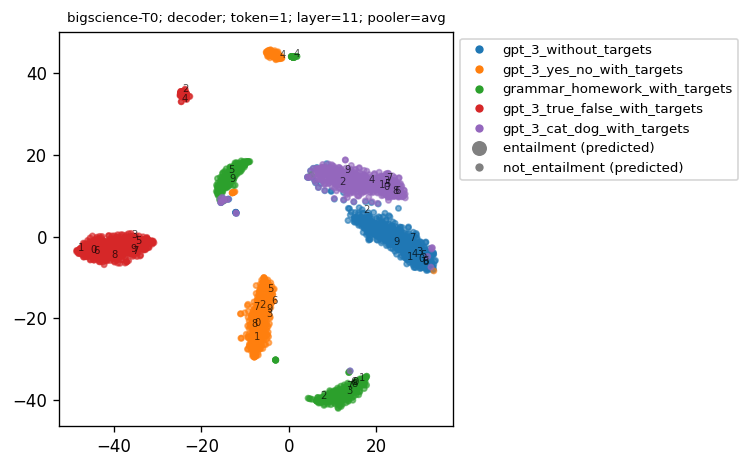

(3190, 4096)


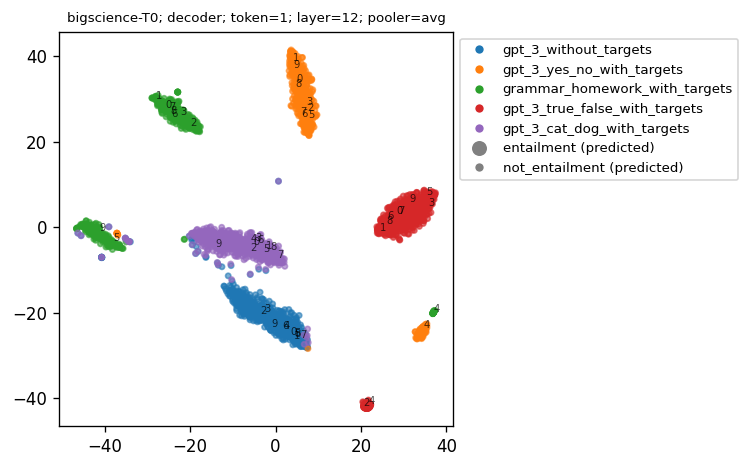

(3190, 4096)


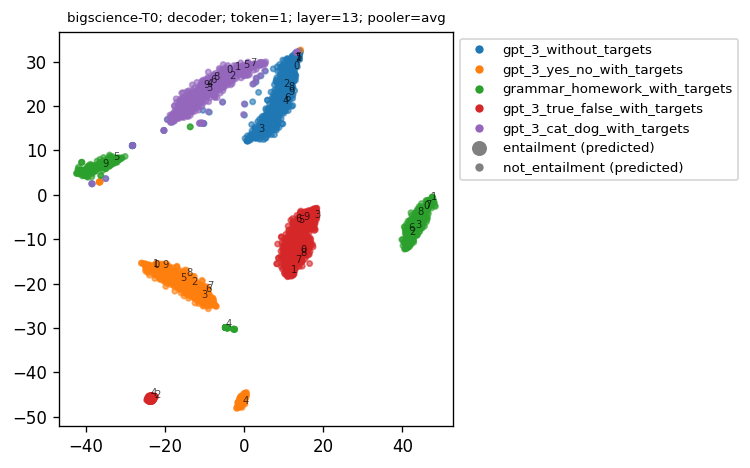

(3190, 4096)


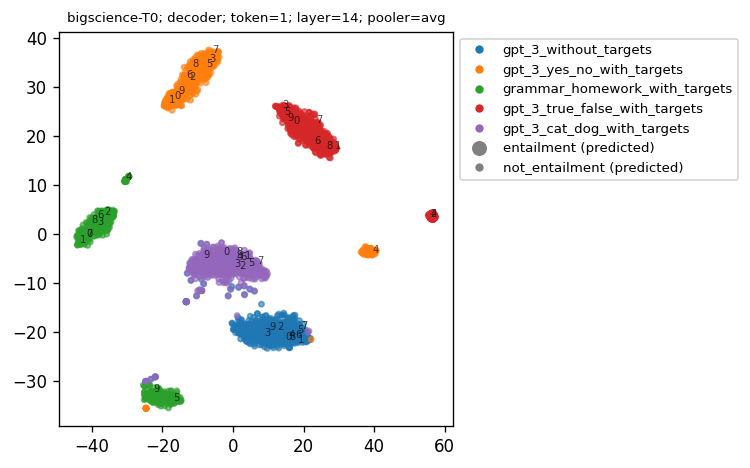

(3190, 4096)


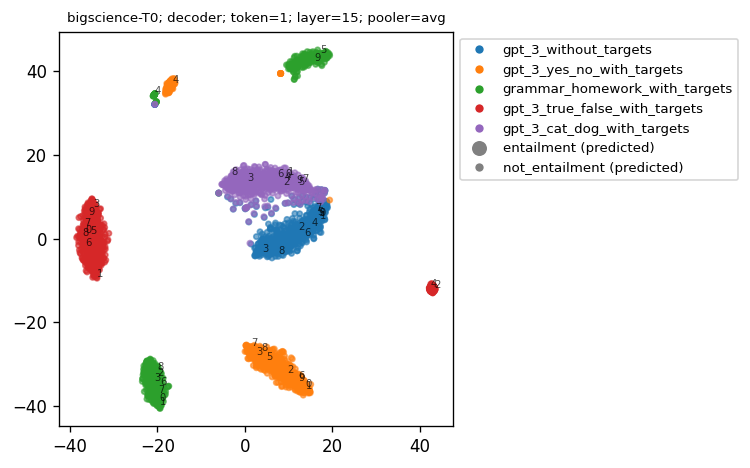

(3190, 4096)


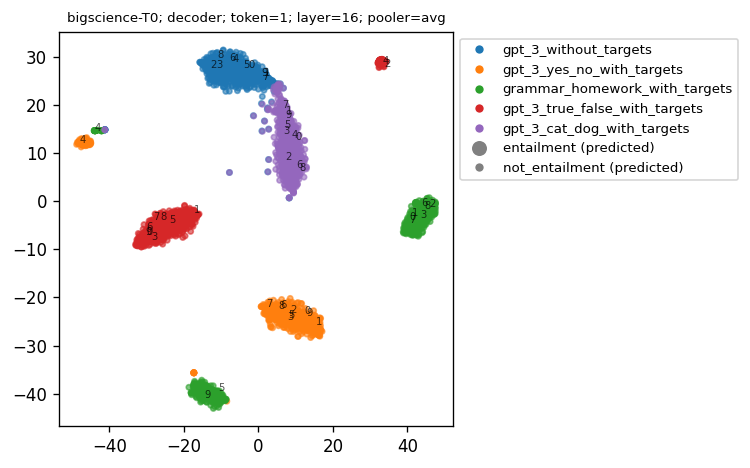

(3190, 4096)


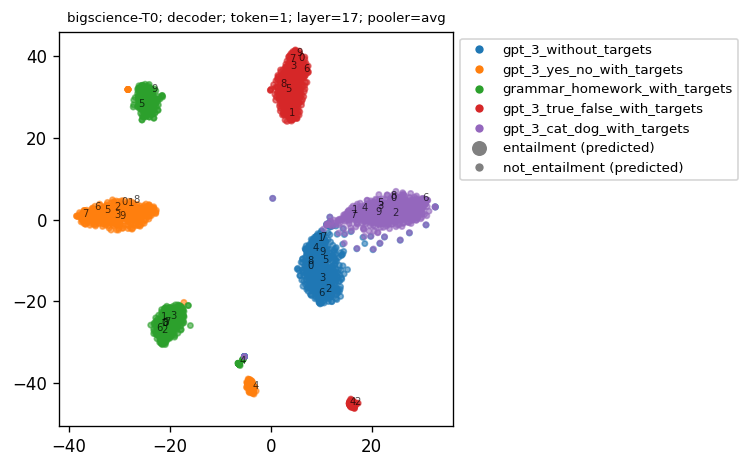

(3190, 4096)


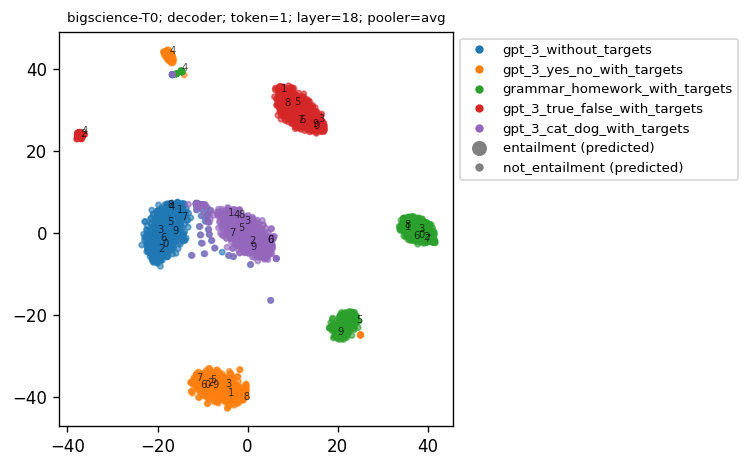

(3190, 4096)


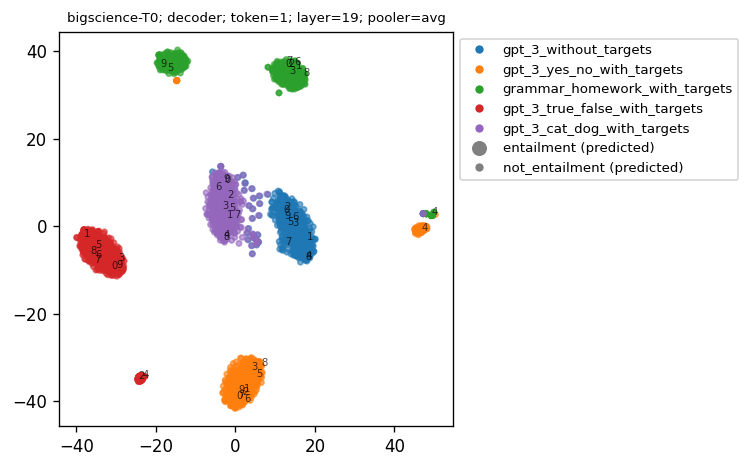

(3190, 4096)


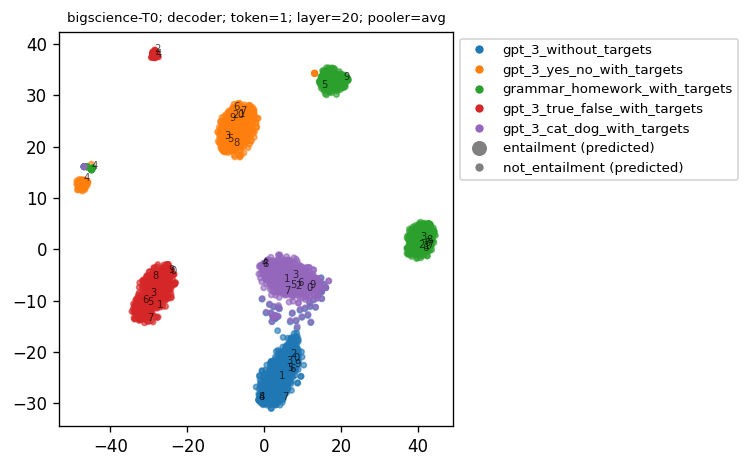

(3190, 4096)


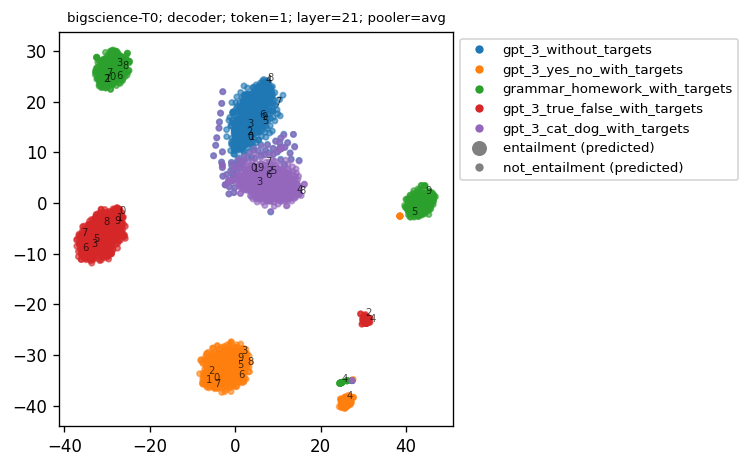

(3190, 4096)


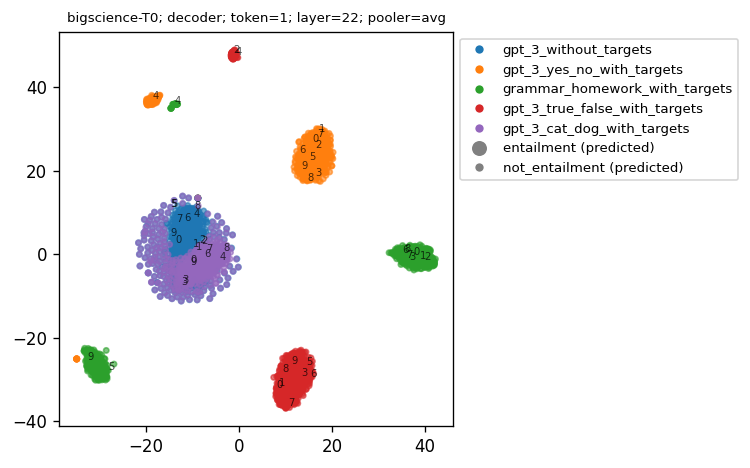

(3190, 4096)


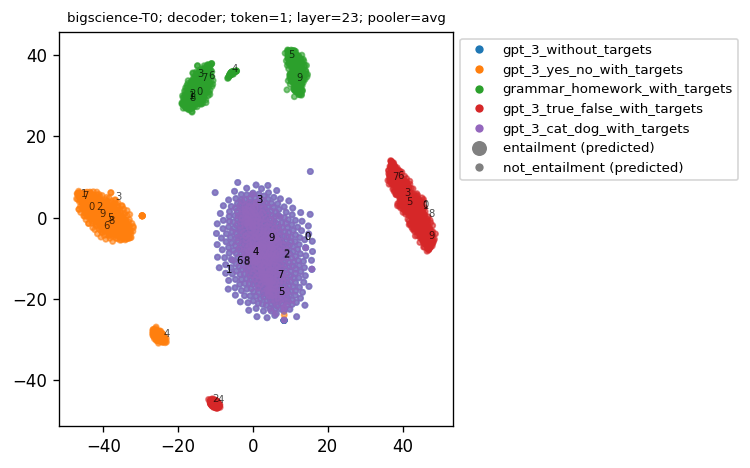

(3190, 4096)


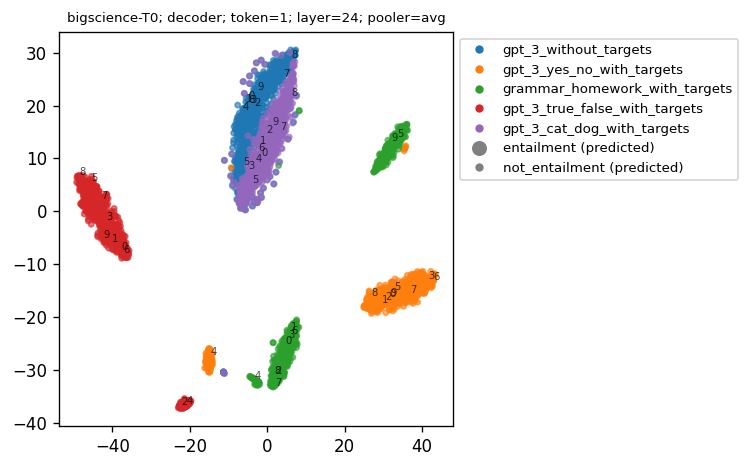

In [11]:
# For decoder representations we need to additionally specify the generated token
# We currently save representations for t=0 and t=1
for t in range(0, 2):
# for t in range(0, 1):
# for t in range(1, 2):
    # for layer in range(0, 2):
    # for layer in range(0, 5):
    for layer in range(0, 25):
    # for layer in range(22, 25):
        
        file_names, prompt_names = [], []

        for _, row in df.iterrows():
            if row['name'] in use_pattern:
                file_names.append(f"{task}/{model}/{module}/{row['name']}/hidden_represenations_t{t}_layer{layer}_avg.hdf5")
                prompt_names.append(row['name'])
        
        # load hidden representations from hdf5 file
        representations = None
        n_sequences = 0

        for file_name in file_names:
            hidden_representations = load_hidden_representations_from_hdf5(os.path.join(log_dir, file_name), silent=True)
            n_sequences = hidden_representations.shape[0]

            if representations is None:
                representations = hidden_representations
            else:
                representations = np.concatenate((representations, hidden_representations), axis=0)

        print(representations.shape)

        # compute t-SNE embeddings
        X = TSNE(
            n_components=2, 
            perplexity=100, 
            init='random', # random or pca
            learning_rate=200,
            n_iter=1000
        ).fit_transform(representations)

        # plot t-SNE embeddings
        fig, axes = plt.subplots(1, 1, figsize=(5.5,4), dpi=120)
        legend_elements= []

        cmap = matplotlib.cm.get_cmap('tab10')
        # cmap = matplotlib.cm.get_cmap('tab20')
        colors = cmap.colors

        for idx, file_name in enumerate(file_names):
            x, y = X[n_sequences*idx:n_sequences*(idx + 1), 0], X[n_sequences*idx:n_sequences*(idx + 1), 1]

            # change size according to label
            if marker_size == 'ground-truth':
                labels = df_inputs[prompt_names[idx]]['label'].values
                sizes = [40.0 if l == 'entailment' else 10.0 for l in labels]
            elif marker_size == 'predicted':
                labels = df_inputs[prompt_names[idx]]['prediction'].values
                sizes = [40.0 if l == 'entailment' else 10.0 for l in labels]

            axes.scatter(x, y, alpha=0.6, color=colors[idx], s=sizes)

            # create legend element manually
            legend_elements.append(Line2D([0], [0], marker='o', color='w', label=prompt_names[idx], markerfacecolor=colors[idx], markersize=6))

            # annotate scatter plot with text
            samles_indices = np.random.choice(range(n_sequences), size=20)
            # for i, txt in enumerate(list(range(n_sequences))): # annotate all samples
            # for i, txt in enumerate(samles_indices): # annotate randomly choosen samples
            for i, txt in enumerate(range(10)): # annotate first 10 samples
                axes.annotate(txt, (x[i], y[i]), alpha=0.7, fontsize=6)

        axes.set_title(f"{model}; {module}; token={t}; layer={layer}; pooler=avg", fontsize=8)

        # Shrink current axis by 20%
        box = axes.get_position()
        axes.set_position([box.x0, box.y0, box.width * 0.8, box.height])

        # Put a legend to the right of the current axis
        # ground-truth labels
        if marker_size == 'ground-truth':
            legend_elements.append(Line2D([0], [0], marker='o', color='w', label='entailment', markerfacecolor='gray', markersize=10))
            legend_elements.append(Line2D([0], [0], marker='o', color='w', label='not_entailment', markerfacecolor='gray', markersize=6))

        # predicted labels
        elif marker_size == 'predicted':
            legend_elements.append(Line2D([0], [0], marker='o', color='w', label='entailment (predicted)', markerfacecolor='gray', markersize=10))
            legend_elements.append(Line2D([0], [0], marker='o', color='w', label='not_entailment (predicted)', markerfacecolor='gray', markersize=6))

        axes.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.0, 1.0), fancybox=True, shadow=False, fontsize=8)

        plt.tight_layout()

        plt.show()
        plt.close();

In [12]:
df

name  \
0                  gpt_3_without_targets   
1              gpt_3_yes_no_with_targets   
2               affirmation_with_targets   
3          grammar_homework_with_targets   
4                polysemous_with_targets   
5       question_context_without_targets   
6       question_meaning_without_targets   
7   question_meaning_yes_no_with_targets   
8                same_sense_with_targets   
9          similar_sense_without_targets   
10     similar_sense_yes_no_with_targets   
11         gpt_3_true_false_with_targets   
12            gpt_3_cat_dog_with_targets   

                                             template     category  \
0   {sentence1} {sentence2} Question: Is the word ...  instructive   
1   {sentence1} {sentence2} Question: Is the word ...  instructive   
2   Sentence A: {sentence1} Sentence B: {sentence2...  instructive   
3   Decide whether the word "{word}" is used with ...  instructive   
4   The word "{word}" has multiple meanings. Does ...  instructive   
5   Determine if the word "{word}" is used in the ...  instructive   
6   Determine if the word "{word}" have the same m...  instructive   
7   Does the word "{word}" have the same meanining...  instructive   
8   Sentence 1: {sentence1} Sentence 2: {sentence2...  instructive   
9    {sentence1} {sentence2} Similar sense of {word}?  instructive   
10  {sentence1} {sentence2} Similar sense of {word...  instructive   
11  {sentence1} {sentence2} Question: Is the word ...  instructive   
12  {sentence1} {sentence2} Question: Is the word ...  instructive   

    includes_targets               targets  target_ids  shuffle  
0              False  ▁No, ▁no, ▁Yes, ▁yes  0, 0, 1, 1    False  
1               True             ▁No, ▁Yes        0, 1    False  
2               True           ▁Fal, ▁True        0, 1    False  
3               True             ▁No, ▁Yes        0, 1    False  
4               True             ▁No, ▁Yes        0, 1    False  
5              False  ▁No, ▁no, ▁Yes, ▁yes  0, 0, 1, 1    False  
6              False  ▁No, ▁no, ▁Yes, ▁yes  0, 0, 1, 1    False  
7               True             ▁No, ▁Yes        0, 1    False  
8               True             ▁No, ▁Yes        0, 1    False  
9              False  ▁No, ▁no, ▁Yes, ▁yes  0, 0, 1, 1    False  
10              True             ▁No, ▁Yes        0, 1    False  
11              True           ▁Fal, ▁True        0, 1    False  
12              True            ▁Cat, ▁Dog        0, 1    False

In [13]:
df[df['name'] == 'gpt_3_yes_no_with_targets']['template'].values

array(['{sentence1} {sentence2} Question: Is the word "{word}" used in the same sense in the two sentences above? Yes, No?'],
      dtype=object)

In [14]:
# get predictions
predictions = {}

for idx, row in df.iterrows():
    file_name = f"{task}/{model}/{module}/{row['name']}/decoded_predictions.csv"
    preds_df = read_predictions_from_file(os.path.join(log_dir, file_name))
    predictions[row['name']] = preds_df

In [15]:
predictions['gpt_3_yes_no_with_targets'].head(11)

predicted_sequence
0    ['<pad>', '▁No', '</s>']
1    ['<pad>', '▁No', '</s>']
2    ['<pad>', '▁No', '</s>']
3    ['<pad>', '▁No', '</s>']
4   ['<pad>', '▁Yes', '</s>']
5    ['<pad>', '▁No', '</s>']
6    ['<pad>', '▁No', '</s>']
7    ['<pad>', '▁No', '</s>']
8    ['<pad>', '▁No', '</s>']
9    ['<pad>', '▁No', '</s>']
10   ['<pad>', '▁No', '</s>']

In [16]:
predictions['gpt_3_true_false_with_targets'].head(11)

predicted_sequence
0       ['<pad>', '▁Fal', 's']
1       ['<pad>', '▁Fal', 's']
2   ['<pad>', '▁True', '</s>']
3       ['<pad>', '▁Fal', 's']
4   ['<pad>', '▁True', '</s>']
5       ['<pad>', '▁Fal', 's']
6       ['<pad>', '▁Fal', 's']
7       ['<pad>', '▁Fal', 's']
8       ['<pad>', '▁Fal', 's']
9       ['<pad>', '▁Fal', 's']
10  ['<pad>', '▁True', '</s>']